In [1]:
# import all the libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

In [2]:
# Merge all the sales data files into a single dataframe
files = [file for file in os.listdir("C:\\Users\\sadak\\Desktop\\datasets\\Sales_Data")]
data = pd.DataFrame()
for file in files:
    df = pd.read_csv("C:\\Users\\sadak\\Desktop\\datasets\\Sales_Data\\" + file)
    data = pd.concat([data,df])
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


## Remove Nan rows and do a general clean-up of data

In [3]:
data = data.dropna()
data["Product"].value_counts()

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Product                         355
Name: Product, dtype: int64

In [4]:
# There is a product named "Product". Seems like a typo so we will take it out
data = data[data["Product"] != "Product"]
data["Product"].value_counts()
# Looks good now

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

## Add Month Column

In [5]:
# Take the first two elements of the Order Date column
data["Month"] = data["Order Date"].str[0:2]
data["Month"] = data["Month"].astype('int')
data["Month"].value_counts()
# Month column looks good since it has values from 1 to 12 as expected

12    24984
10    20282
4     18279
11    17573
5     16566
3     15153
7     14293
6     13554
2     11975
8     11961
9     11621
1      9709
Name: Month, dtype: int64

## Add Sales column

In [6]:
# Multiply price each by quantity ordered
data["Quantity Ordered"] = data["Quantity Ordered"].astype('float')
data["Price Each"] = data["Price Each"].astype('float')
data["Sales"] = data["Quantity Ordered"] * data["Price Each"]

## Best month for sales

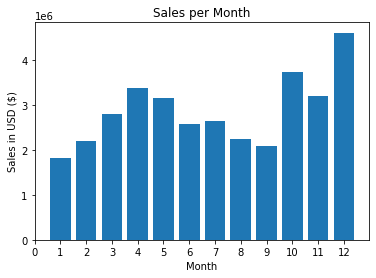

In [7]:
sales = data.groupby("Month").sum()
a = range(1,13)
plt.bar(a,sales['Sales'])
plt.xlabel("Month")
plt.xticks(np.arange(0, 13, step=1))
plt.ylabel("Sales in USD ($)")
plt.title("Sales per Month")
plt.show()

# As we can clearly see, December was the best month for sales

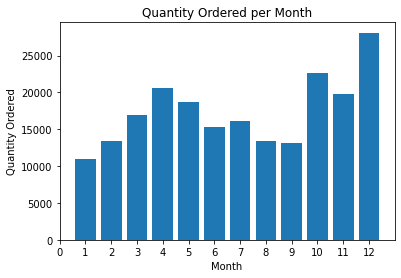

In [8]:
plt.bar(a,sales['Quantity Ordered'])
plt.xlabel("Month")
plt.xticks(np.arange(0, 13, step=1))
plt.ylabel("Quantity Ordered")
plt.title("Quantity Ordered per Month")
plt.show()

# There is a clear match between these two graphs. More goods sold, more money made as expected

## City with best sales

In [9]:
# Creat a city column 
def get_city(a):
    return a.split(',')[1]
def get_state(a):
    return a.split(',')[2].split(' ')[1]
data["City"] = data["Purchase Address"].apply(lambda x: get_city(x) + ', ' + get_state(x))
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX"
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA"
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA"
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"


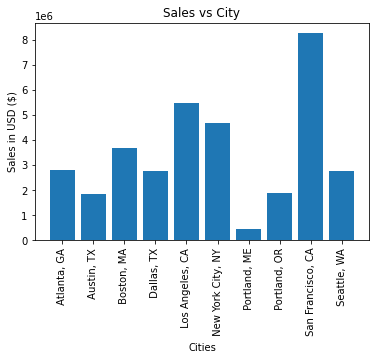

In [10]:
city_sales = data.groupby("City").sum()
plt.bar(city_sales.index,city_sales["Sales"])
plt.xlabel("Cities")
plt.ylabel("Sales in USD ($)")
plt.title("Sales vs City")
plt.xticks(rotation=90)
plt.show()

# It is clear that San Francisco, CA has the highest sales
# whereas Portland, ME has the lowest

## Which time is best to show ads

In [11]:
data["Order Date"] = pd.to_datetime(data["Order Date"])
data["Hour"] = data["Order Date"].dt.hour
data["Count"] = 1

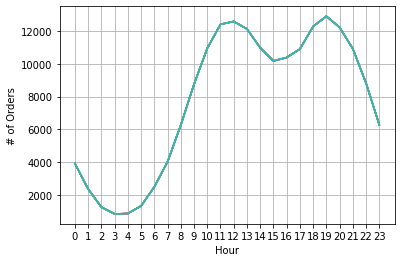

In [12]:
hours = [hour for hour,df in data.groupby("Hour")]
plt.plot(hours, data.groupby("Hour").count())
plt.xlabel("Hour")
plt.ylabel("# of Orders")
plt.xticks(hours)
plt.grid()
plt.show()

# As we can see, there are two maximums
# Showing ads during these times will ensure that most people will see them

## What products most often sold together

In [13]:
# If order ID is same, they were bought together
df = data[data["Order ID"].duplicated(keep=False)]
df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ', '.join(x))
df

C:\Users\sadak\AppData\Local\Temp/ipykernel_17472/2231323955.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ', '.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Count,Grouped
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",14,1,"Google Phone, Wired Headphones"
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",14,1,"Google Phone, Wired Headphones"
18,176574,Google Phone,1.0,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",19,1,"Google Phone, USB-C Charging Cable"
19,176574,USB-C Charging Cable,1.0,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,"Los Angeles, CA",19,1,"Google Phone, USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1.0,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,"Boston, MA",11,1,"Bose SoundSport Headphones, Bose SoundSport He..."
...,...,...,...,...,...,...,...,...,...,...,...,...
11628,259303,AA Batteries (4-pack),1.0,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,3.84,"Atlanta, GA",20,1,"34in Ultrawide Monitor, AA Batteries (4-pack)"
11639,259314,Wired Headphones,1.0,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,"Atlanta, GA",0,1,"Wired Headphones, AAA Batteries (4-pack)"
11640,259314,AAA Batteries (4-pack),2.0,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,5.98,"Atlanta, GA",0,1,"Wired Headphones, AAA Batteries (4-pack)"
11677,259350,Google Phone,1.0,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,600.00,"San Francisco, CA",13,1,"Google Phone, USB-C Charging Cable"


In [14]:
df = df[["Order ID","Grouped"]].drop_duplicates()

In [15]:
count = Counter()
for row in df["Grouped"]:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
temp = pd.DataFrame(count.keys())
temp["Items"] = temp[0] + ", " + temp[1]
temp = temp.drop([0,1],axis=1)
temp["Count"] = count.values()
temp = temp.sort_values("Count",ascending = False)

In [16]:
temp

# We can see which items sold together the most
# and accordingly advertise them together

,Items,Count
8,"iPhone, Lightning Charging Cable",1005
1,"Google Phone, USB-C Charging Cable",987
13,"iPhone, Wired Headphones",447
0,"Google Phone, Wired Headphones",414
22,"Vareebadd Phone, USB-C Charging Cable",361
...,...,...
302,"Wired Headphones, Wired Headphones",1
301,"20in Monitor, 34in Ultrawide Monitor",1
78,"27in 4K Gaming Monitor, Vareebadd Phone",1
299,"LG Dryer, 27in FHD Monitor",1


## Which product sold the most and why?

In [17]:
products = data.groupby("Product")["Quantity Ordered"].sum()
products.sort_values(ascending=False)

# AAA batteries sold the most at 31017 units
# This might be because they are cheap and widely-popular in electronics

Product
AAA Batteries (4-pack)        31017.0
AA Batteries (4-pack)         27635.0
USB-C Charging Cable          23975.0
Lightning Charging Cable      23217.0
Wired Headphones              20557.0
Apple Airpods Headphones      15661.0
Bose SoundSport Headphones    13457.0
27in FHD Monitor               7550.0
iPhone                         6849.0
27in 4K Gaming Monitor         6244.0
34in Ultrawide Monitor         6199.0
Google Phone                   5532.0
Flatscreen TV                  4819.0
Macbook Pro Laptop             4728.0
ThinkPad Laptop                4130.0
20in Monitor                   4129.0
Vareebadd Phone                2068.0
LG Washing Machine              666.0
LG Dryer                        646.0
Name: Quantity Ordered, dtype: float64

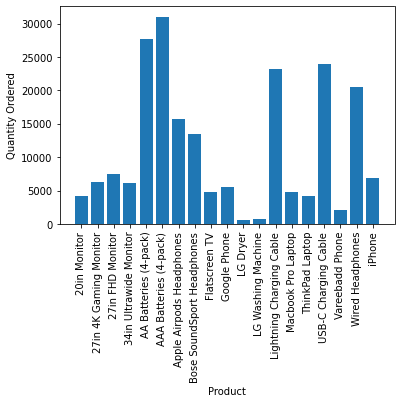

In [18]:
plt.bar(products.index, products)
plt.xticks(rotation=90)
plt.xlabel("Product")
plt.ylabel("Quantity Ordered")
plt.show()

C:\Users\sadak\AppData\Local\Temp/ipykernel_17472/22861012.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products.index,rotation=90)


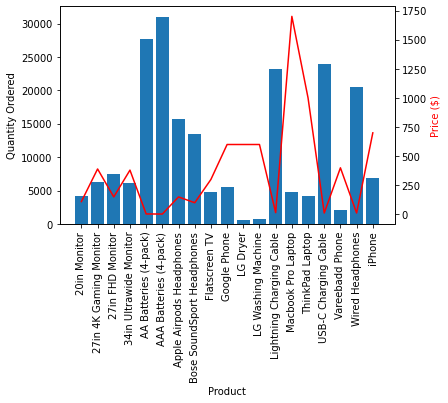

In [19]:
# Let us examine if our hypothesis holds true
prices = data.groupby("Product")["Price Each"].mean()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products.index, products)
ax2.plot(products.index, prices, 'r-')

ax1.set_xlabel("Product")
ax1.set_xticklabels(products.index,rotation=90)
ax1.set_ylabel("Quantity Ordered")
ax2.set_ylabel("Price ($)",color='r')
plt.show()

# Our hypothesis is mostly true; as the price increases, quantity ordered usually decreases